<a href="https://colab.research.google.com/github/gmvarshini/Credit-Score-Classification/blob/main/Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing necessary Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

### Loading and Exploring Data

In [2]:
df = pd.read_csv("/content/train.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Dropping irrelevant features

In [3]:
df_c = df.copy()

In [4]:
df_c.drop(['ID' ,'Customer_ID' ,'Month' ,'Name', 'Type_of_Loan', 'Credit_History_Age', 'SSN'], axis=1, inplace=True)

In [5]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57290 entries, 0 to 57289
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       57290 non-null  object 
 1   Occupation                57290 non-null  object 
 2   Annual_Income             57290 non-null  object 
 3   Monthly_Inhand_Salary     48679 non-null  float64
 4   Num_Bank_Accounts         57290 non-null  int64  
 5   Num_Credit_Card           57290 non-null  int64  
 6   Interest_Rate             57290 non-null  int64  
 7   Num_of_Loan               57290 non-null  object 
 8   Delay_from_due_date       57290 non-null  int64  
 9   Num_of_Delayed_Payment    53315 non-null  object 
 10  Changed_Credit_Limit      57290 non-null  object 
 11  Num_Credit_Inquiries      56201 non-null  float64
 12  Credit_Mix                57290 non-null  object 
 13  Outstanding_Debt          57290 non-null  object 
 14  Credit

### Handling missing values

<Axes: >

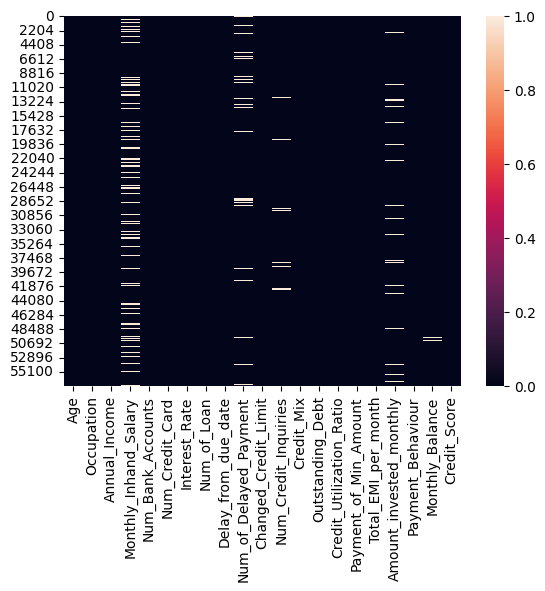

In [6]:
sns.heatmap(df_c.isnull())

In [7]:
df_c.isnull().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       8611
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      3975
Changed_Credit_Limit           0
Num_Credit_Inquiries        1089
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2531
Payment_Behaviour              1
Monthly_Balance              714
Credit_Score                   1
dtype: int64

### Checking for Duplicates

In [8]:
df_c.duplicated().sum()

0

### Dropping all observations with more than 3 missing values

In [9]:
size_before_cleaning = df_c.shape
df_c = df_c[df_c.isnull().sum(axis=1) < 3]
print("{} Records dropped".format(size_before_cleaning[0] - df_c.shape[0]))

59 Records dropped


In [10]:
def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)

In [11]:
def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    elif str(value) == '_':
        return str(value)
    else:
        return str(value)

In [12]:
def Amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

In [13]:
df_c["Amount_invested_monthly"]=df_c["Amount_invested_monthly"].apply(Amount_invested_monthly)
df_c["Amount_invested_monthly"]=df_c["Amount_invested_monthly"].astype("float")

In [14]:
df_c["Changed_Credit_Limit"]=df_c["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])
df_c.drop(df_c[df_c["Changed_Credit_Limit"]=="_"].index,inplace=True)
df_c["Changed_Credit_Limit"]=df_c["Changed_Credit_Limit"].astype("float")

In [15]:
df_c.drop(df_c[df_c["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
for i in ['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Monthly_Balance']:
    df_c[i] = df_c[i].apply(filter_general)
    df_c[i] = df_c[i].astype(np.float64)
    print(i + " Successfully Cleaned")

Age Successfully Cleaned
Annual_Income Successfully Cleaned
Num_of_Loan Successfully Cleaned
Outstanding_Debt Successfully Cleaned
Monthly_Balance Successfully Cleaned


In [16]:
df_c['Num_of_Delayed_Payment'] = df_c['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
df_c['Num_of_Delayed_Payment'] = df_c['Num_of_Delayed_Payment'].astype(np.float64)

In [17]:
df_c['Occupation'] = df_c['Occupation'].replace('_______', np.nan)
df_c['Occupation'] = df_c['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [18]:
df_c['Credit_Mix'] = df_c['Credit_Mix'].replace('_', np.nan)
df_c['Credit_Mix'] = df_c['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

In [19]:
df_c['Payment_of_Min_Amount'] = df_c['Payment_of_Min_Amount'].replace('NM', np.nan)
df_c['Payment_of_Min_Amount'] = df_c['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [20]:
df_c['Payment_Behaviour'] = df_c['Payment_Behaviour'].replace('!@9#%8', np.nan)
df_c['Payment_Behaviour'] = df_c['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'])))

In [21]:
for i in ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly']:
    df_c[i].fillna(df_c[i].median(), inplace=True)

In [22]:
df_c['Monthly_Balance'].fillna(df_c['Monthly_Balance'].median(), inplace=True)

### Data Visualization and Statistical insights

In [23]:
df_c.describe(include='all').style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,56037.000000,56037,56037.000000,56037.000000,56037.000000,56037.000000,56037.000000,56037.000000,56037.000000,56037.000000,56037.000000,56037.000000,56037,56037.000000,56037.000000,56037,56037.000000,56037.000000,56037,56037.000000,56037
unique,nan,15,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3,nan,nan,2,nan,nan,6,nan,3
top,nan,Entrepreneur,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Bad,nan,nan,Yes,nan,nan,Low_spent_Small_value_payments,nan,Standard
freq,nan,7355,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,22053,nan,nan,29390,nan,nan,14366,nan,29767
mean,116.999358,nan,175329.933396,4030.087863,16.934847,22.880490,71.050145,10.585292,21.171851,28.420490,10.455733,27.097953,nan,1426.712132,32.310279,nan,1422.571597,608.480627,nan,401.277071,nan
std,670.961902,nan,1419526.537569,2978.426609,116.665524,131.104601,461.344391,60.970175,14.876849,206.847474,6.703516,187.890027,nan,1163.381004,5.109833,nan,8410.544149,1984.193568,nan,211.990855,nan
min,14.000000,nan,7005.930000,319.556250,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.000000,nan,0.540000,20.000000,nan,0.000000,0.000000,nan,0.088628,nan
25%,25.000000,nan,19435.600000,1790.985000,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.290000,3.000000,nan,566.050000,28.083179,nan,30.738949,76.976951,nan,271.028306,nan
50%,33.000000,nan,37485.370000,3081.170833,6.000000,6.000000,13.000000,3.000000,18.000000,14.000000,9.370000,6.000000,nan,1151.710000,32.346846,nan,69.020960,135.936688,nan,336.497499,nan
75%,42.000000,nan,72608.320000,5381.720321,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.910000,9.000000,nan,1941.950000,36.518254,nan,162.668139,255.719955,nan,465.979679,nan


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>,
        <Axes: title={'center': 'Monthly_Balance'}>]], dtype=object)

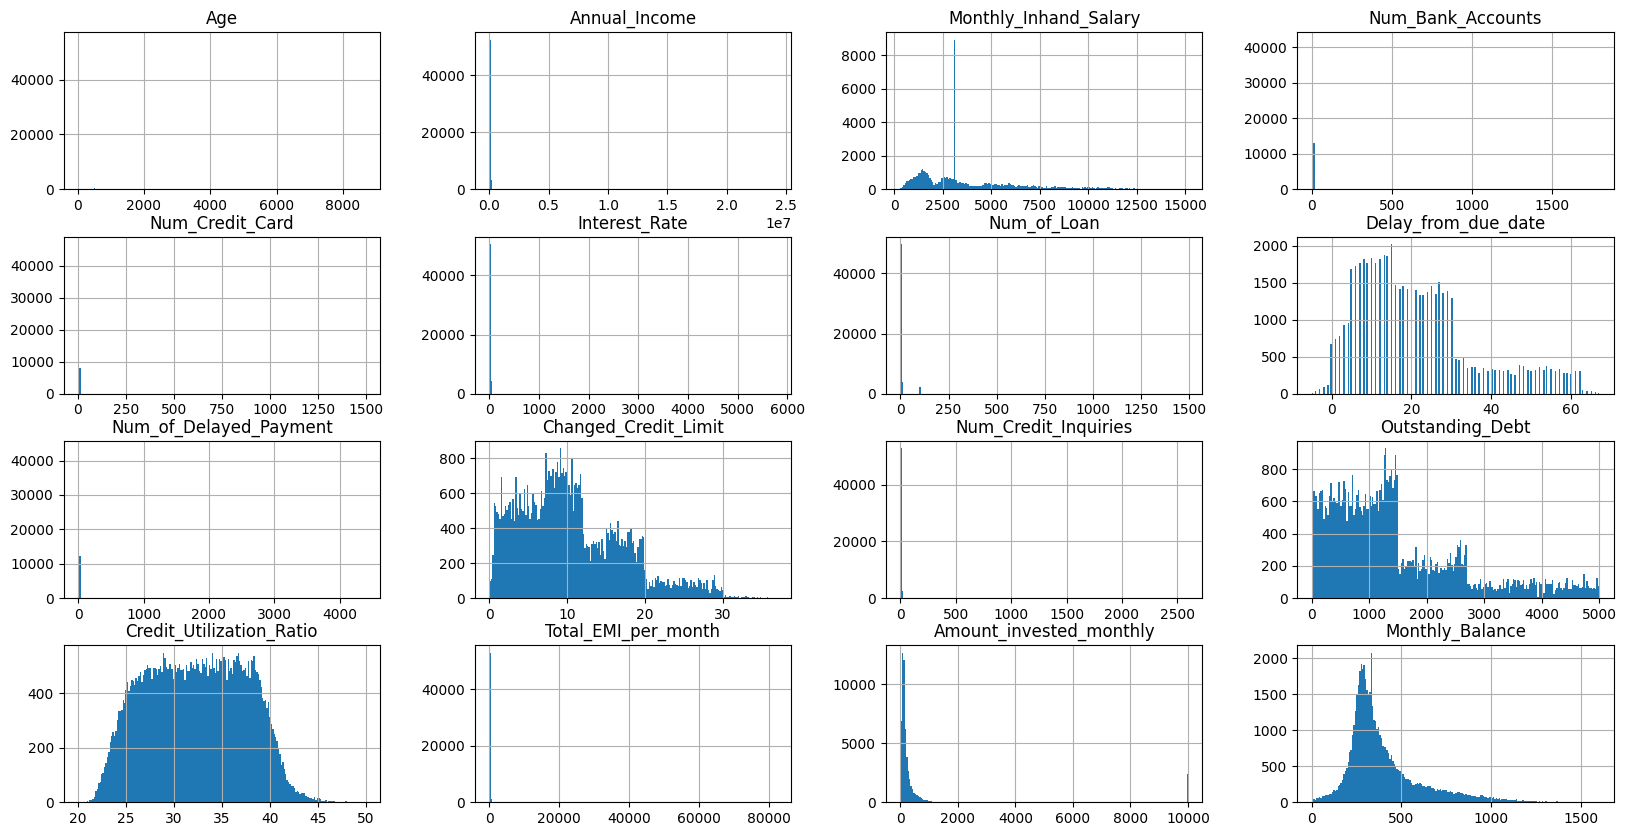

In [24]:
df_c.hist(bins=200,figsize=[20,10])

In [25]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

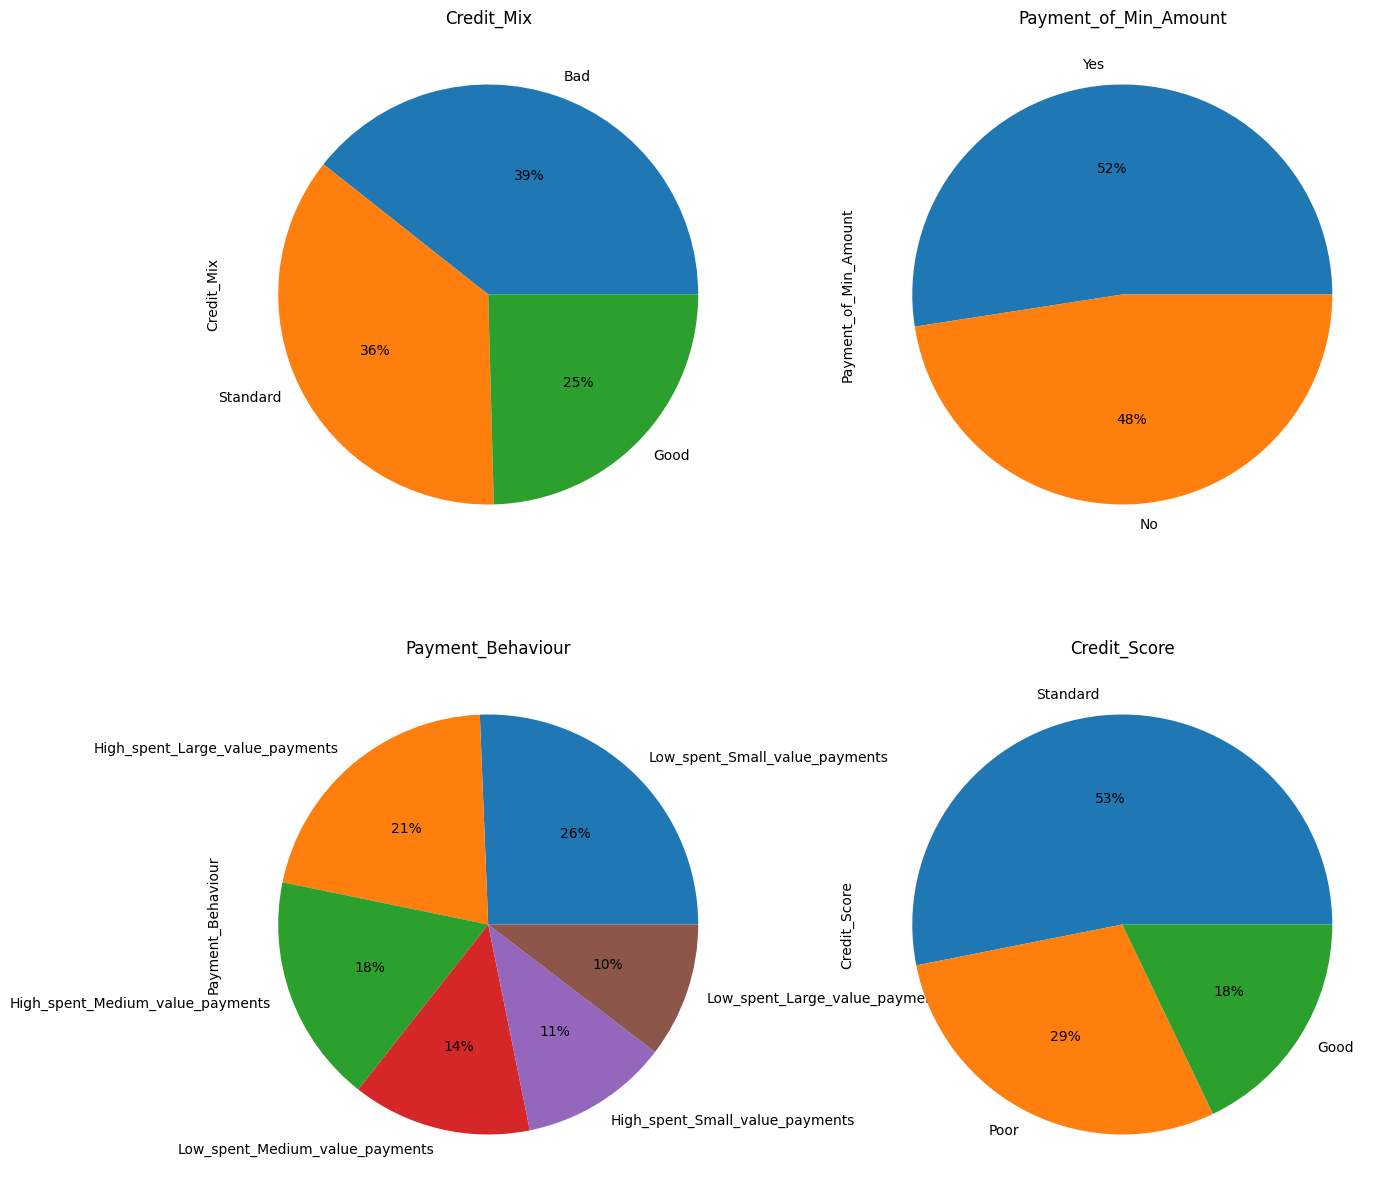

In [26]:
pie_plot(df_c, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'], 2,2)

In [27]:
df_c.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,Bad,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,3081.170833,3,4,3,4.0,-1,14.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,23.0,Scientist,19114.12,3081.170833,3,4,3,4.0,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,14.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,23.0,Scientist,19114.12,3081.170833,3,4,3,4.0,8,4.0,9.27,4.0,Good,809.98,27.262259,No,49.574949,62.430172,High_spent_Large_value_payments,340.479212,Good


In [28]:
numeric_cols = df_c.select_dtypes(exclude = "object").columns
cat_cols = df_c.select_dtypes(include = "object").columns
print(numeric_cols)
print(cat_cols)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')
Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


### Bivariate Categorical Analysis


<Axes: xlabel='Occupation', ylabel='count'>

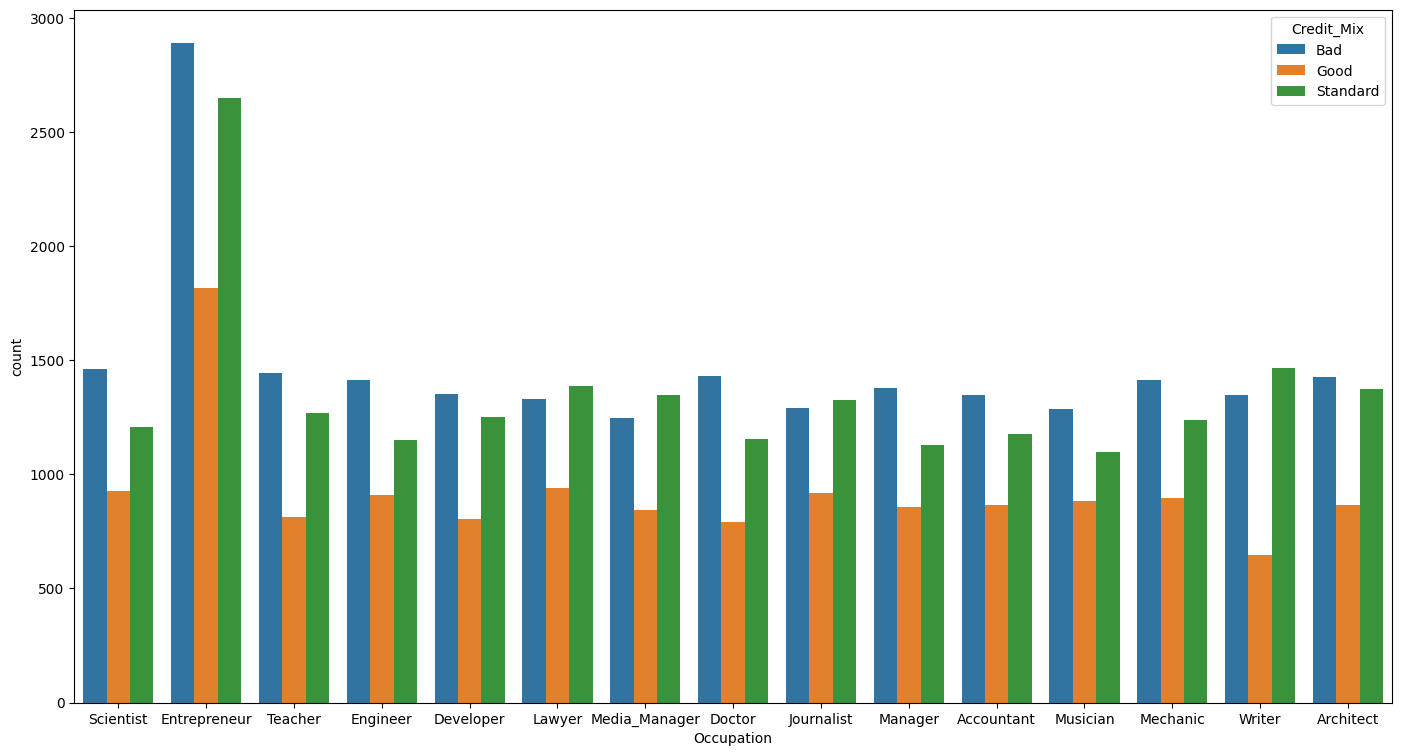

In [29]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df_c,x="Occupation",hue="Credit_Mix")

<Axes: xlabel='Occupation', ylabel='count'>

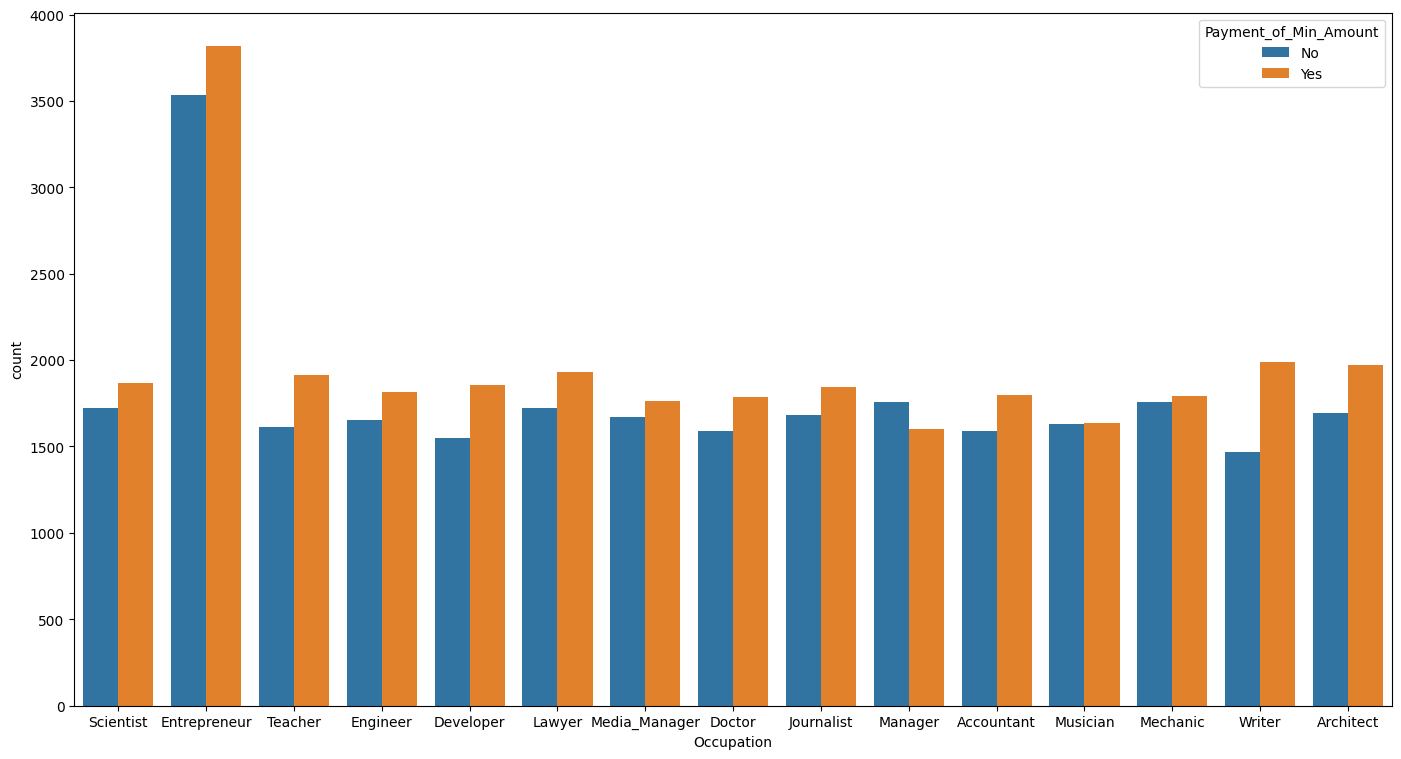

In [30]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df_c,x="Occupation",hue="Payment_of_Min_Amount")

<Axes: xlabel='Occupation', ylabel='count'>

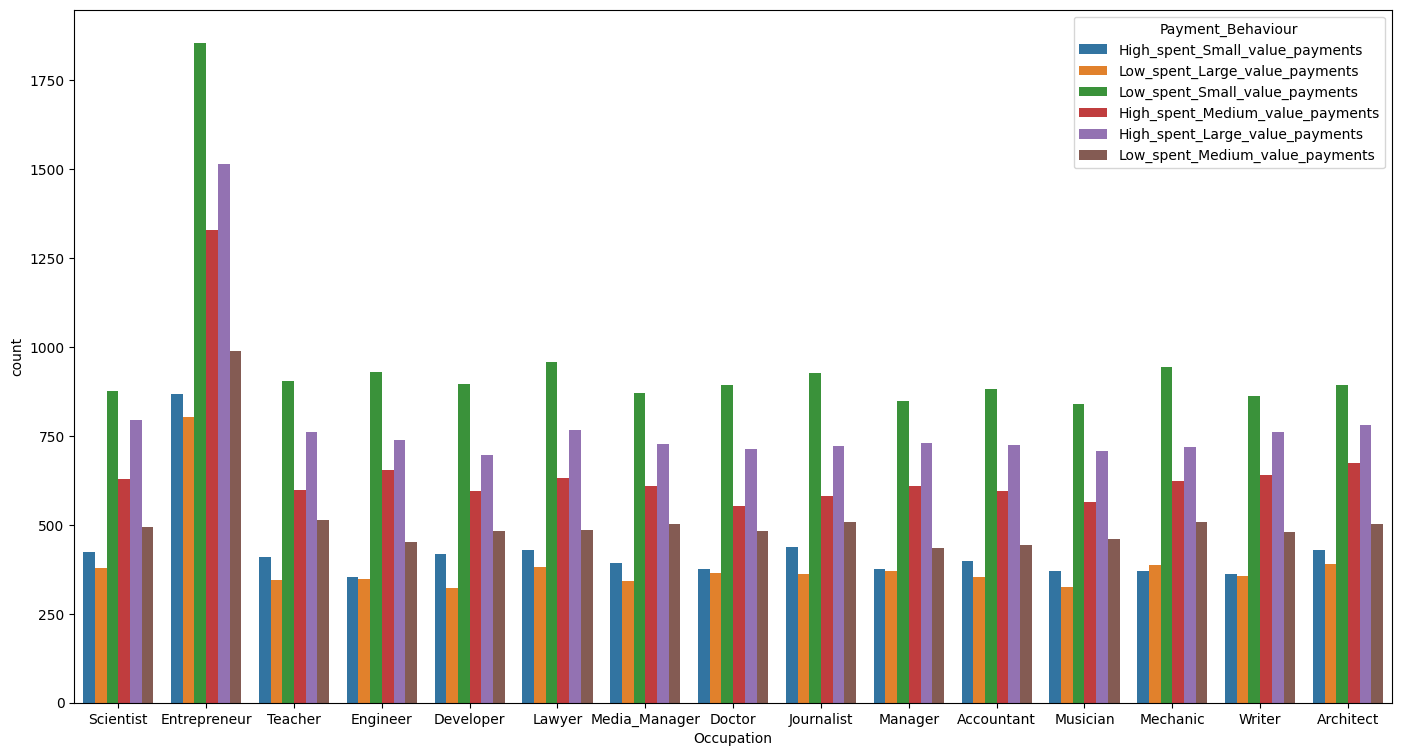

In [31]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df_c,x="Occupation",hue="Payment_Behaviour")

<Axes: xlabel='Occupation', ylabel='count'>

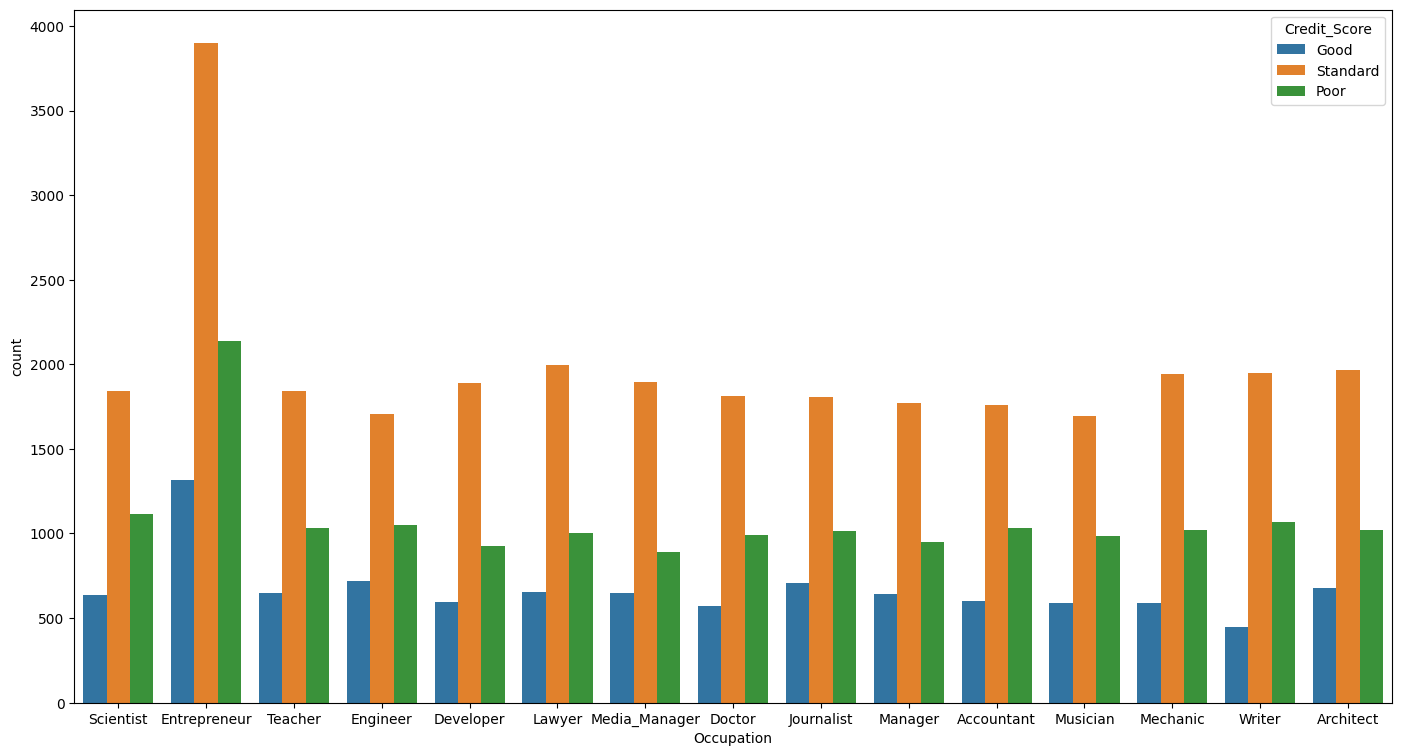

In [32]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df_c,x="Occupation",hue="Credit_Score")

## Checking multicollinearity with VIF
Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

<img src="http://ai-ml-analytics.com/wp-content/uploads/2020/07/VIF_variance_inflation_factor.gif" width="250"/>

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [33]:
vif_df = df_c[numeric_cols]

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,Age,1.030352
1,Annual_Income,1.016093
2,Monthly_Inhand_Salary,4.734487
3,Num_Bank_Accounts,1.021492
4,Num_Credit_Card,1.029984
5,Interest_Rate,1.023794
6,Num_of_Loan,1.029981
7,Delay_from_due_date,4.461191
8,Num_of_Delayed_Payment,1.019082
9,Changed_Credit_Limit,4.291423


<Axes: >

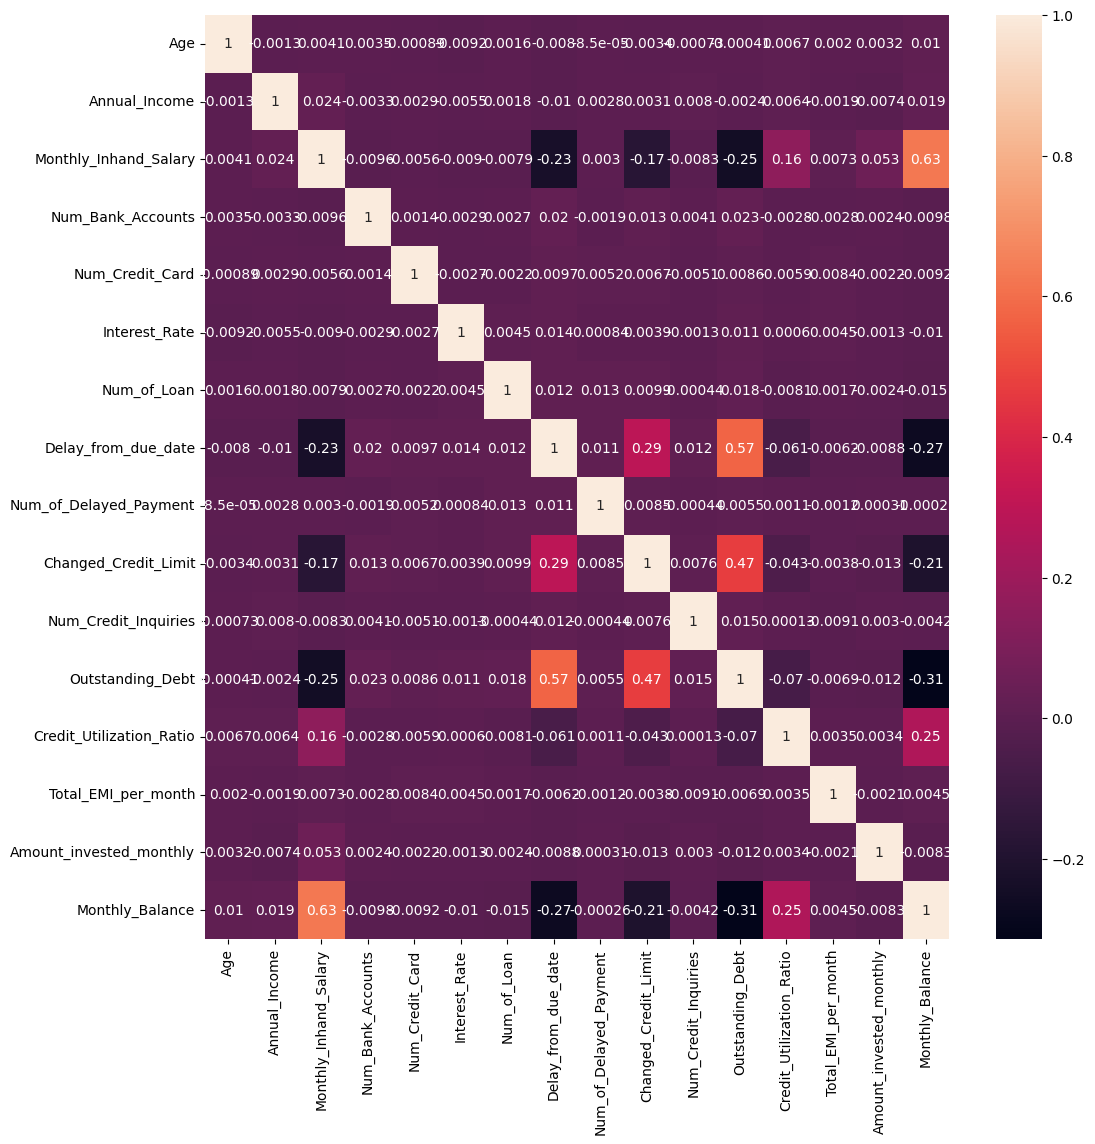

In [34]:
plt.figure(figsize= (12,12))
sns.heatmap(df_c[numeric_cols].corr(),annot=True)

We notice that data is clear from multi-colinearity from the VIF test and confirmed with the correlation matrix

### Dealing with outliers

<img src=https://miro.medium.com/max/1204/1*SNAAr7HVCuRee8J4DToMLA.png width=700 />

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations. Two activities are essential for characterizing a set of data:

* Examination of the overall shape of the graphed data for important features, including symmetry and departures from assumptions.
* Examination of the data for unusual observations that are far removed from the mass of data. These points are often referred to as outliers. Two graphical techniques for identifying outliers, scatter plots and box plots, along with an analytic procedure for detecting outliers when the distribution is normal (Grubbs' Test)

In [35]:
def box_plot(df_c, num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(df_c[l], palette="flare")

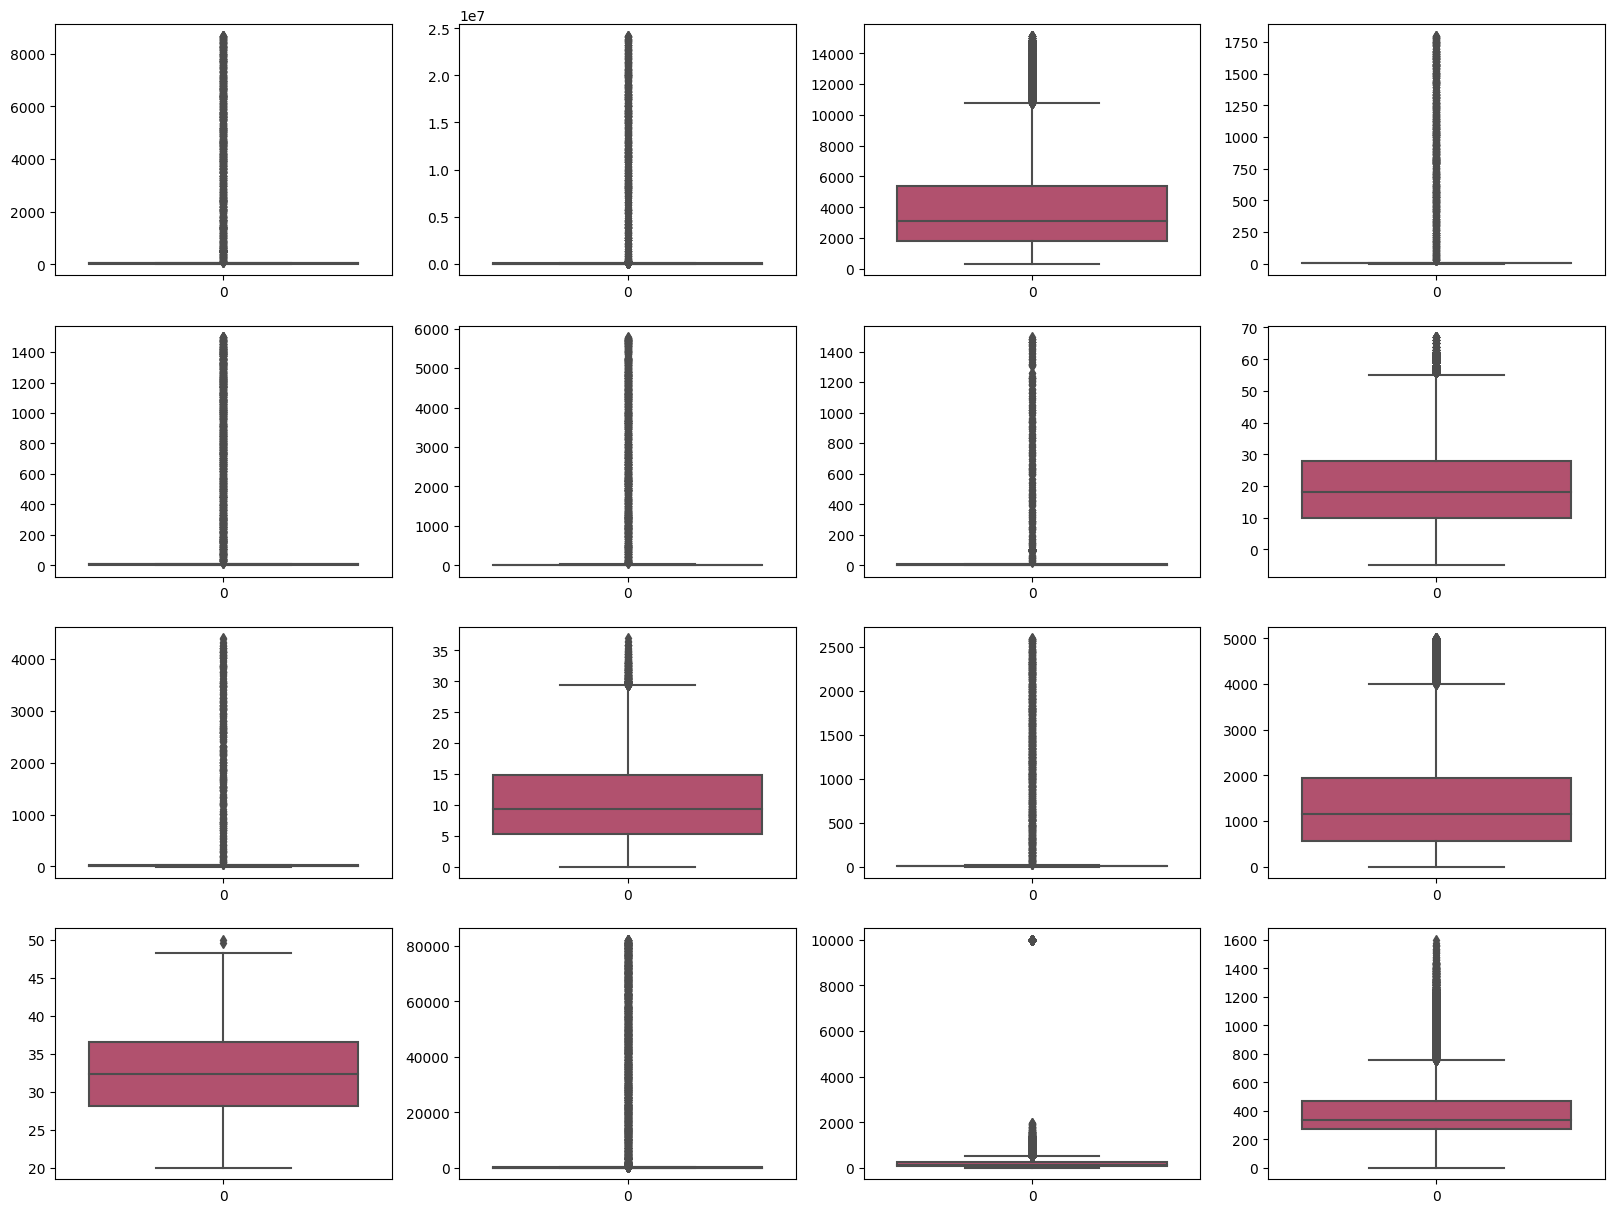

In [36]:
box_plot(df_c, numeric_cols)

### IQR (Inter Quartile Range)

IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

    IQR = Quartile3 – Quartile1

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

    upper = Q3 +1.5*IQR

    lower = Q1 – 1.5*IQR

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [37]:
df_c_n = df_c.copy()
for i in numeric_cols:
    ''' Detection '''
    # IQR
    Q1 = np.percentile(df_c_n[i], 0.05,interpolation = 'midpoint')
    Q3 = np.percentile(df_c_n[i], 99.95,interpolation = 'midpoint')
    print("@ Feature " + i + "...")
    print("Old Shape: ", df_c_n.shape)
    df_c_n[numeric_cols] = df_c_n[numeric_cols][(df_c_n[i] < Q3) & (df_c_n[i] > Q1)]
    df_c_n.dropna(inplace=True)
    print("New Shape: ", df_c_n.shape)

@ Feature Age...
Old Shape:  (56037, 21)
New Shape:  (55317, 21)
@ Feature Annual_Income...
Old Shape:  (55317, 21)
New Shape:  (55256, 21)
@ Feature Monthly_Inhand_Salary...
Old Shape:  (55256, 21)
New Shape:  (55199, 21)
@ Feature Num_Bank_Accounts...
Old Shape:  (55199, 21)
New Shape:  (52626, 21)
@ Feature Num_Credit_Card...
Old Shape:  (52626, 21)
New Shape:  (51571, 21)
@ Feature Interest_Rate...
Old Shape:  (51571, 21)
New Shape:  (50199, 21)
@ Feature Num_of_Loan...
Old Shape:  (50199, 21)
New Shape:  (45119, 21)
@ Feature Delay_from_due_date...
Old Shape:  (45119, 21)
New Shape:  (45030, 21)
@ Feature Num_of_Delayed_Payment...
Old Shape:  (45030, 21)
New Shape:  (44907, 21)
@ Feature Changed_Credit_Limit...
Old Shape:  (44907, 21)
New Shape:  (44861, 21)
@ Feature Num_Credit_Inquiries...
Old Shape:  (44861, 21)
New Shape:  (42166, 21)
@ Feature Outstanding_Debt...
Old Shape:  (42166, 21)
New Shape:  (42121, 21)
@ Feature Credit_Utilization_Ratio...
Old Shape:  (42121, 21)
New 

In [38]:
df_c_n.drop(df_c_n[df_c_n["Age"] >= 80].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Annual_Income"] >= 500000].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_Bank_Accounts"] >= 20].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_Credit_Card"] >= 50].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_of_Loan"] >= 20].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Interest_Rate"] >= 35].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_of_Delayed_Payment"] >= 30].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_Credit_Inquiries"] >= 100].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Total_EMI_per_month"] >= 2000].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Amount_invested_monthly"] >= 1000].index, inplace=True)

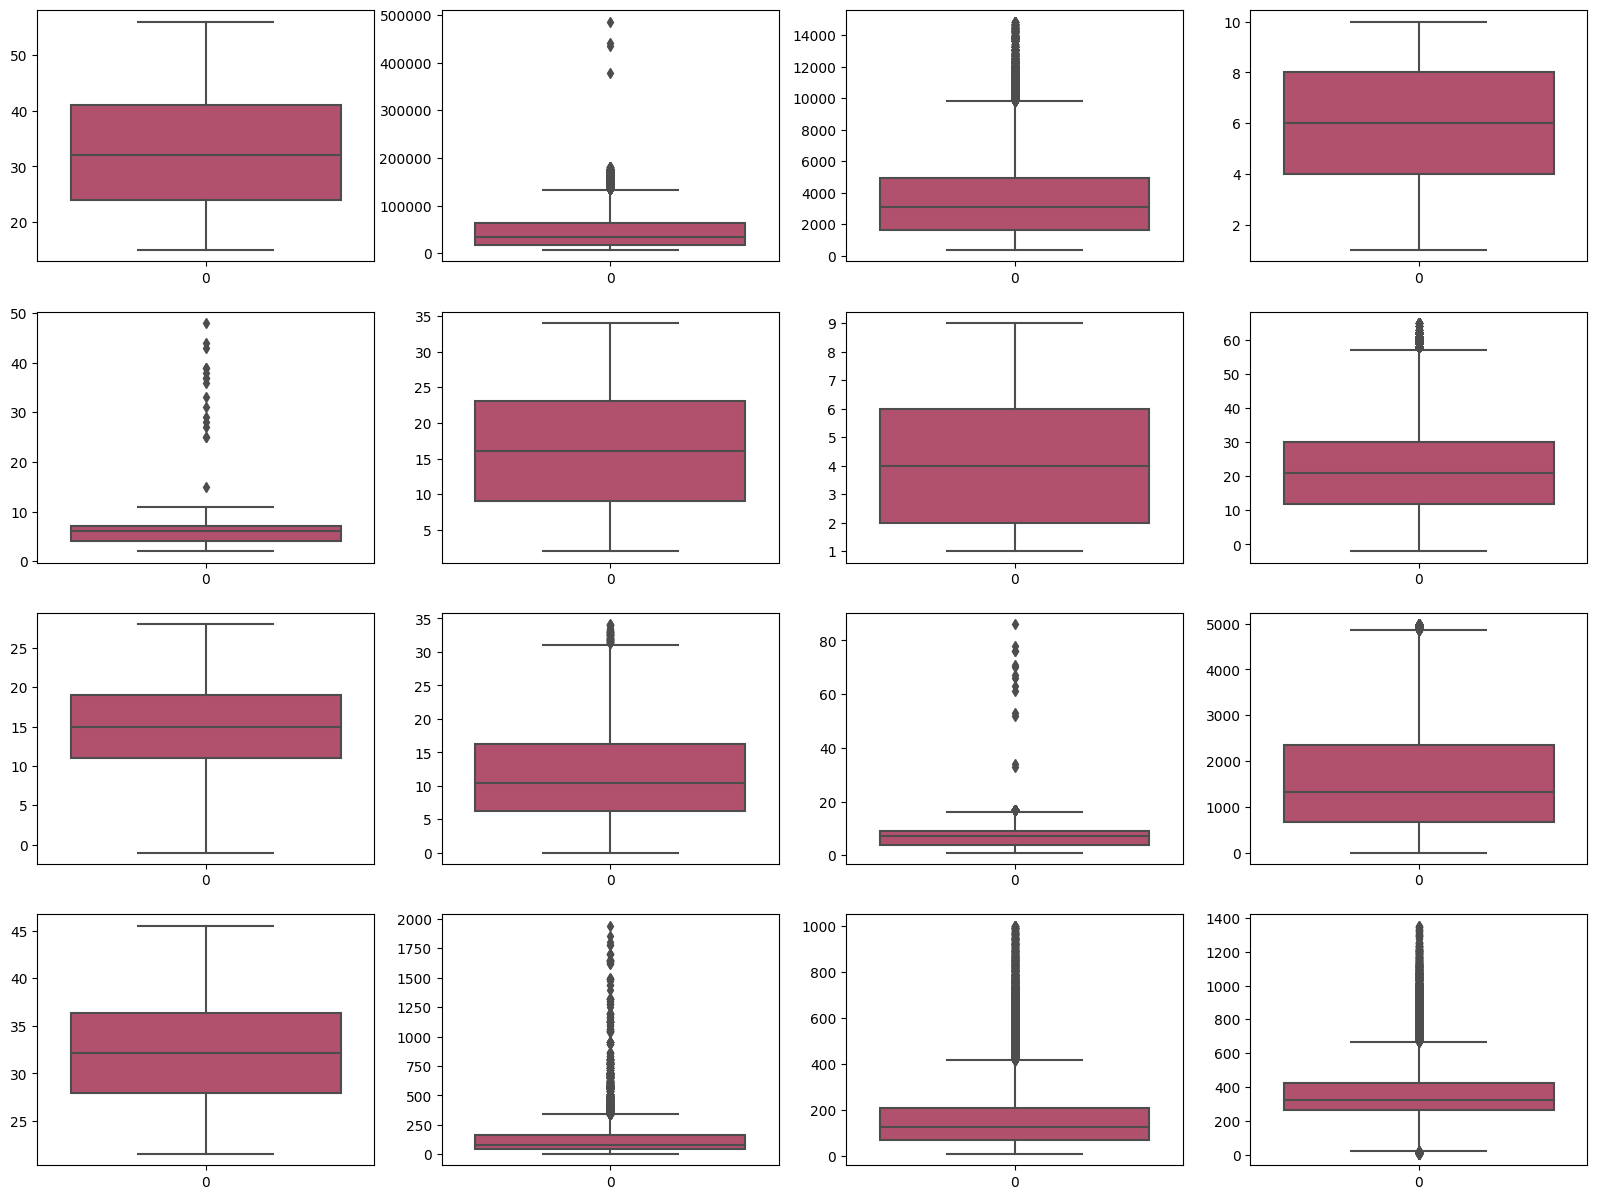

In [39]:
box_plot(df_c_n, numeric_cols)

## Handling numerical data

#### StandardScaler
follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. 

#### MinMaxScaler 
scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005]. 
In the presence of outliers, StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values. 
By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset. 

In [40]:
df_num_clean = df_c_n[numeric_cols].copy()

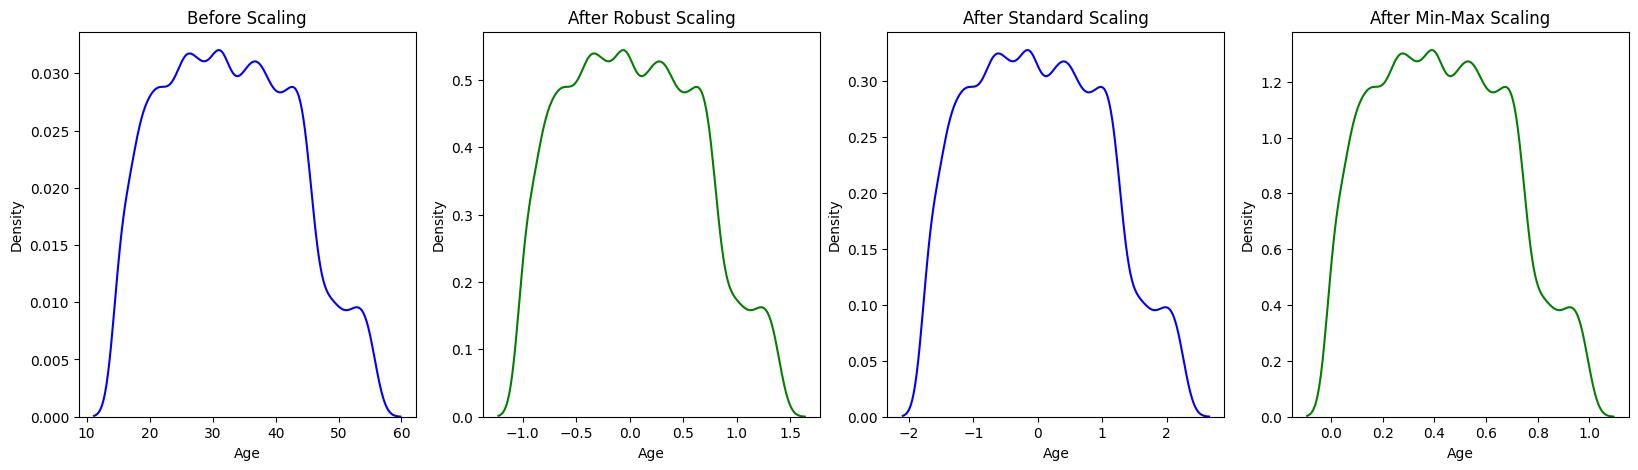

In [41]:
cols = numeric_cols
scaler = preprocessing.RobustScaler()
robust_df_ = scaler.fit_transform(df_num_clean)
robust_df_ = pd.DataFrame(robust_df_, columns =cols)
  
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df_num_clean)
standard_df = pd.DataFrame(standard_df, columns =cols)
  
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df_num_clean)
minmax_df = pd.DataFrame(minmax_df, columns =cols)
  
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
  
sns.kdeplot(df_num_clean['Age'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
  
sns.kdeplot(robust_df_['Age'], ax = ax2, color ='g')
ax3.set_title('After Standard Scaling')
  
sns.kdeplot(standard_df['Age'], ax = ax3, color ='b')
ax4.set_title('After Min-Max Scaling')
  
sns.kdeplot(minmax_df['Age'], ax = ax4, color ='g')
plt.show()

In [42]:
def RobustScaling(df_num, cols):
    scaler = preprocessing.RobustScaler()
    robust_df_temp = scaler.fit_transform(df_num)
    robust_df_temp = pd.DataFrame(robust_df_temp, columns =cols)
    return robust_df_temp

In [43]:
robust_scaled = RobustScaling(df_num_clean, numeric_cols)

In [44]:
robust_scaled.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-0.529412,-0.335976,-0.384967,-0.75,-0.666667,-0.928571,0.0,-1.000000,-1.000,0.091343,-0.6,-0.305952,-0.630837,-0.22253,-0.334912,-0.045244
1,-0.529412,-0.335976,0.000000,-0.75,-0.666667,-0.928571,0.0,-1.222222,-0.125,0.091343,-0.6,-0.305952,-0.020048,-0.22253,-0.061672,-0.217036
2,-0.529412,-0.335976,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.888889,-1.375,-0.410540,-0.6,-0.305952,-0.087669,-0.22253,0.524122,-0.594208
3,-0.529412,-0.335976,-0.384967,-0.75,-0.666667,-0.928571,0.0,-0.833333,-0.125,0.091343,-0.6,-0.305952,-0.872331,-0.22253,-0.616308,0.133515
4,-0.529412,-0.335976,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.722222,-1.375,-0.109410,-0.6,-0.305952,-0.578414,-0.22253,-0.464696,0.127288


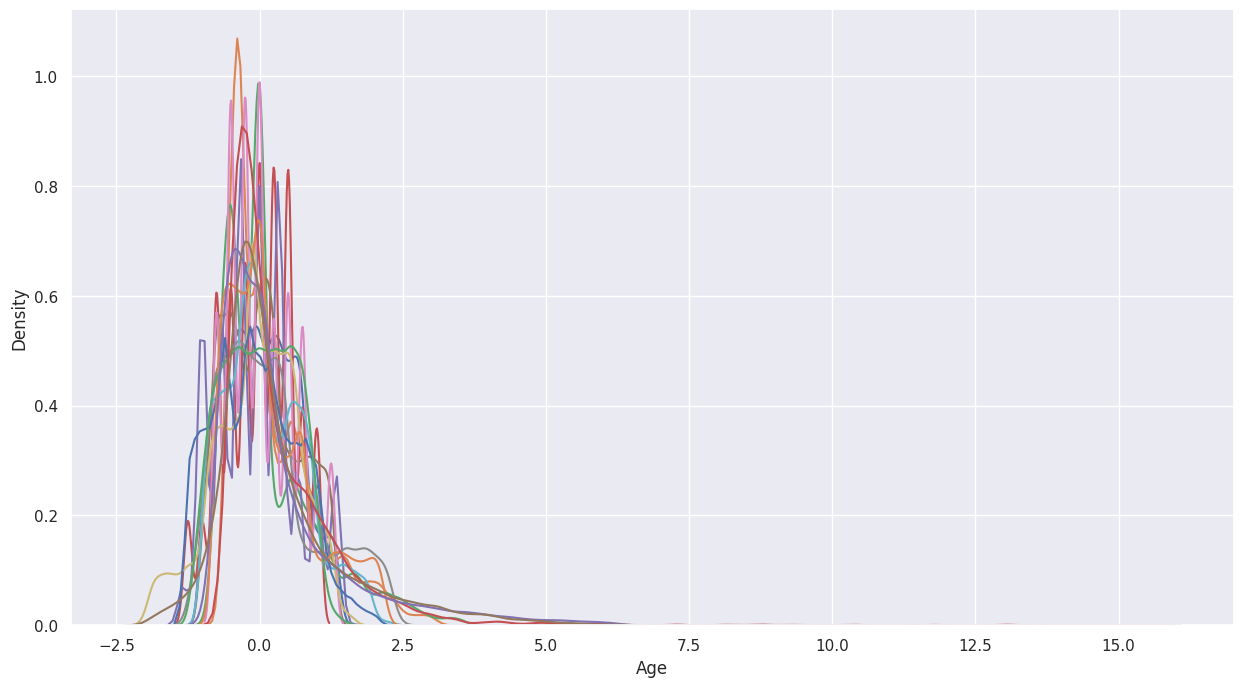

In [45]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numeric_cols:
    sns.kdeplot(robust_scaled[i], legend=True)

In [46]:
clean_df = df_c.copy()
clean_df.drop(labels=numeric_cols, axis="columns", inplace=True)
clean_df[numeric_cols] = robust_scaled[numeric_cols]

In [47]:
clean_df.head()

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,Scientist,Bad,No,High_spent_Small_value_payments,Good,-0.529412,-0.335976,-0.384967,-0.75,-0.666667,-0.928571,0.0,-1.000000,-1.000,0.091343,-0.6,-0.305952,-0.630837,-0.22253,-0.334912,-0.045244
1,Scientist,Good,No,Low_spent_Large_value_payments,Good,-0.529412,-0.335976,0.000000,-0.75,-0.666667,-0.928571,0.0,-1.222222,-0.125,0.091343,-0.6,-0.305952,-0.020048,-0.22253,-0.061672,-0.217036
3,Scientist,Good,No,Low_spent_Small_value_payments,Good,-0.529412,-0.335976,-0.384967,-0.75,-0.666667,-0.928571,0.0,-0.833333,-0.125,0.091343,-0.6,-0.305952,-0.872331,-0.22253,-0.616308,0.133515
4,Scientist,Good,No,High_spent_Medium_value_payments,Good,-0.529412,-0.335976,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.722222,-1.375,-0.109410,-0.6,-0.305952,-0.578414,-0.22253,-0.464696,0.127288
5,Scientist,Good,No,High_spent_Large_value_payments,Good,-0.529412,-0.335976,-0.384967,-0.75,-0.666667,-0.928571,0.0,-1.000000,-0.875,0.091343,-0.6,-0.305952,-1.141785,-0.22253,0.371760,-0.464037


## Categorical data encoding
<img src="https://miro.medium.com/max/1400/1*TuPcb9C8rIkmpP3dZ3fp_w.png" width="600"/>

### Label Encoding
 is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.
### Label Encoding challenges
 there is a very high probability that the model captures the relationship between values like they were ordinal which isn't suitble for example for ocean proximity here.

### One-Hot Encoding

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

In [48]:
clean_df['Credit_Score'].replace({"Poor":0, "Standard":1, "Good":2}, inplace=True)
clean_df['Credit_Mix'].replace({"Bad":0, "Standard":1, "Good":2}, inplace=True)
clean_df['Payment_of_Min_Amount'].replace({"Yes":1, "No":0}, inplace=True)
clean_df = pd.get_dummies(clean_df, columns = ['Occupation', 'Payment_Behaviour'])

In [49]:
for i in numeric_cols:
    clean_df[i].fillna(method='ffill', inplace=True)

In [50]:
clean_df.head()

,Credit_Mix,Payment_of_Min_Amount,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0,0,2,-0.529412,-0.335976,-0.384967,-0.75,-0.666667,-0.928571,0.0,-1.000000,-1.000,0.091343,-0.6,-0.305952,-0.630837,-0.22253,-0.334912,-0.045244,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2,0,2,-0.529412,-0.335976,0.000000,-0.75,-0.666667,-0.928571,0.0,-1.222222,-0.125,0.091343,-0.6,-0.305952,-0.020048,-0.22253,-0.061672,-0.217036,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,0,2,-0.529412,-0.335976,-0.384967,-0.75,-0.666667,-0.928571,0.0,-0.833333,-0.125,0.091343,-0.6,-0.305952,-0.872331,-0.22253,-0.616308,0.133515,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,2,0,2,-0.529412,-0.335976,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.722222,-1.375,-0.109410,-0.6,-0.305952,-0.578414,-0.22253,-0.464696,0.127288,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,2,0,2,-0.529412,-0.335976,-0.384967,-0.75,-0.666667,-0.928571,0.0,-1.000000,-0.875,0.091343,-0.6,-0.305952,-1.141785,-0.22253,0.371760,-0.464037,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


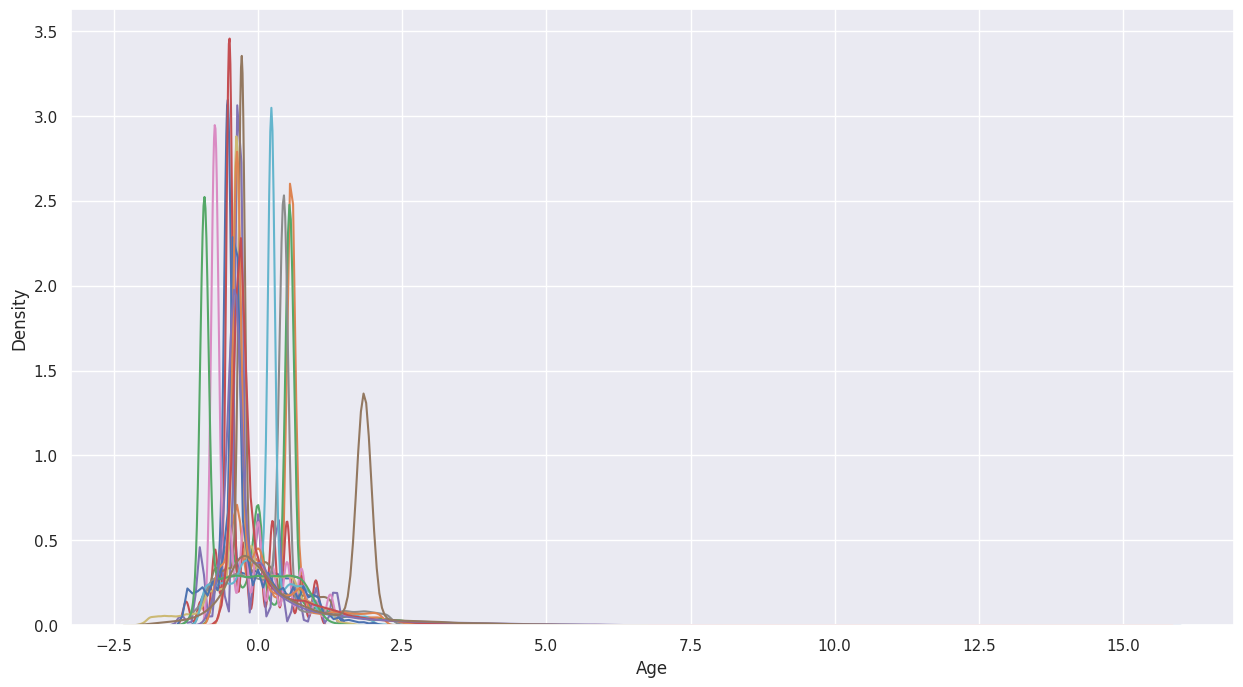

In [51]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numeric_cols:
    sns.kdeplot(clean_df[i], legend=True)

## Summary of Data Preprocessing
The data went through the process of cleaning as follows:
* Explored and visualized the data
* Handled missing values.
* Handled Outliers.
* Handled categorical data encoding using one hot encoder and Label encoder.
* Handled numerical values using a Robust Scaler

## Modeling
The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data. The output from modeling is a trained model that can be used for inference, making predictions on new data points.

<img src="https://docs.microsoft.com/en-us/windows/ai/images/winml-model-flow.png" width="600"/>

A machine learning model itself is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.
Once you have trained the model, you can use it to reason over data that it hasn't seen before, and make predictions about those data. For example, let's say you want to build an application that can recognize a user's emotions based on their facial expressions. You can train a model by providing it with images of faces that are each tagged with a certain emotion, and then you can use that model in an application that can recognize any user's emotion

In [52]:
x_clean = clean_df.drop(['Credit_Score'] , axis = 1).values
y_clean = clean_df['Credit_Score'].values

### Principal Component Analysis

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

<img src = https://hands-on.cloud/wp-content/uploads/2022/02/Implementing-Principal-component-analysis-PCA-using-Python.png width = "600"/>

#### Advantages of PCA

There are two main advantages of dimensionality reduction with PCA.

* The training time of the algorithms reduces significantly with less number of features.
* It is not always possible to analyze data in high dimensions. For instance if there are 100 features in a dataset. Total number of scatter plots required to visualize the data would be 100(100-1)2 = 4950. Practically it is not possible to analyze data this way.


In [53]:
pca = PCA(n_components=0.98)
x_reduced = pca.fit_transform(x_clean)
print("Number of original features is {} and of reduced features is {}".format(x_clean.shape[1], x_reduced.shape[1]))

Number of original features is 39 and of reduced features is 33


In [54]:
x_reduced.shape

(56037, 33)

In [55]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(x_reduced, y_clean, test_size=0.2, random_state=42)

In [56]:
evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

## Logistic Regression
This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

<img src = https://miro.medium.com/max/888/1*D4CIwT2zRCcVq88iji6qYQ.png />

In this logistic regression equation, h is the dependent or response variable and x is the independent variable. The beta parameter, or coefficient, in this model is commonly estimated via maximum likelihood estimation (MLE). This method tests different values of beta through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimate. Once the optimal coefficient (or coefficients if there is more than one independent variable) is found, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability. For binary classification, a probability less than .5 will predict 0 while a probability greater than 0 will predict 1.  After the model has been computed, it’s best practice to evaluate the how well the model predicts the dependent variable, which is called goodness of fit. 

#### Binary logistic regression:

In this approach, the response or dependent variable is dichotomous in nature—i.e. it has only two possible outcomes (e.g. 0 or 1). Some popular examples of its use include predicting if an e-mail is spam or not spam or if a tumor is malignant or not malignant. Within logistic regression, this is the most commonly used approach, and more generally, it is one of the most common classifiers for binary classification.

#### Multinomial logistic regression:

In this type of logistic regression model, the dependent variable has three or more possible outcomes; however, these values have no specified order.  For example, movie studios want to predict what genre of film a moviegoer is likely to see to market films more effectively. A multinomial logistic regression model can help the studio to determine the strength of influence a person's age, gender, and dating status may have on the type of film that they prefer. The studio can then orient an advertising campaign of a specific movie toward a group of people likely to go see it.

Training Accuracy Logistic Regression 56.14669075821455  Test Accuracy Logistic Regression 55.6566738044254


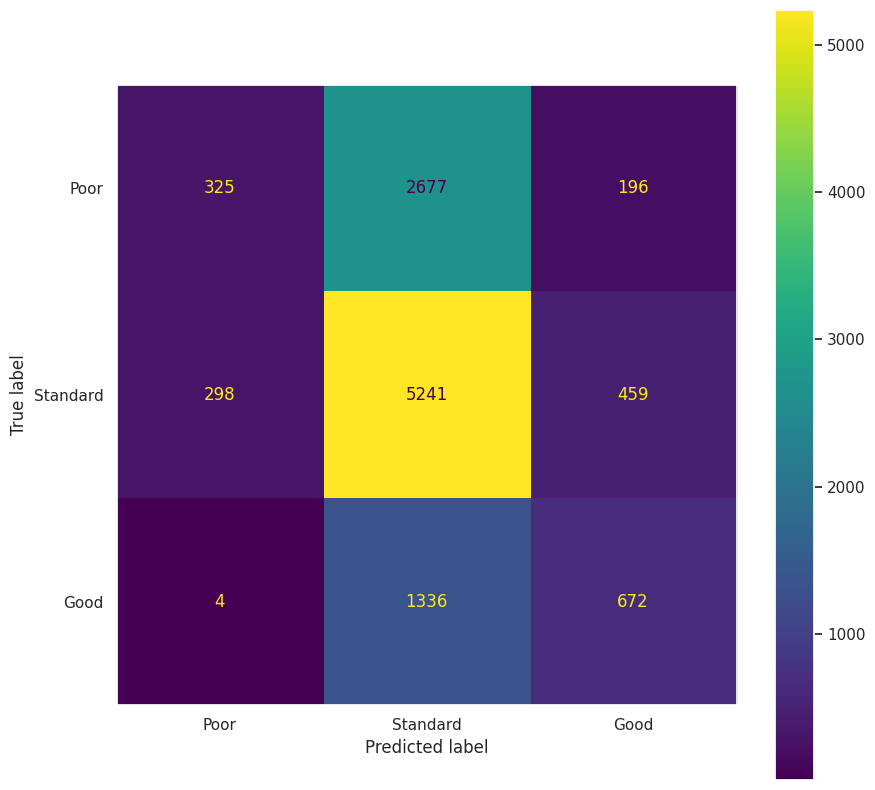

In [57]:
lr = LogisticRegression().fit(X_train_clean, y_train_clean)
evaluate_classification(lr, "Logistic Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

##  k-nearest neighbors
The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

<img src = https://miro.medium.com/max/1400/1*56MmutHmr4WzDJrufP8kug.png width = 600/>

### Determine your distance metrics

In order to determine which data points are closest to a given query point, the distance between the query point and the other data points will need to be calculated. These distance metrics help to form decision boundaries, which partitions query points into different regions. You commonly will see decision boundaries visualized with Voronoi diagram.

<img src = https://i.stack.imgur.com/JKtab.png/>

Training Accuracy KNeighborsClassifiern 61.37991032590511  Test Accuracy KNeighborsClassifiern 57.55710206995004


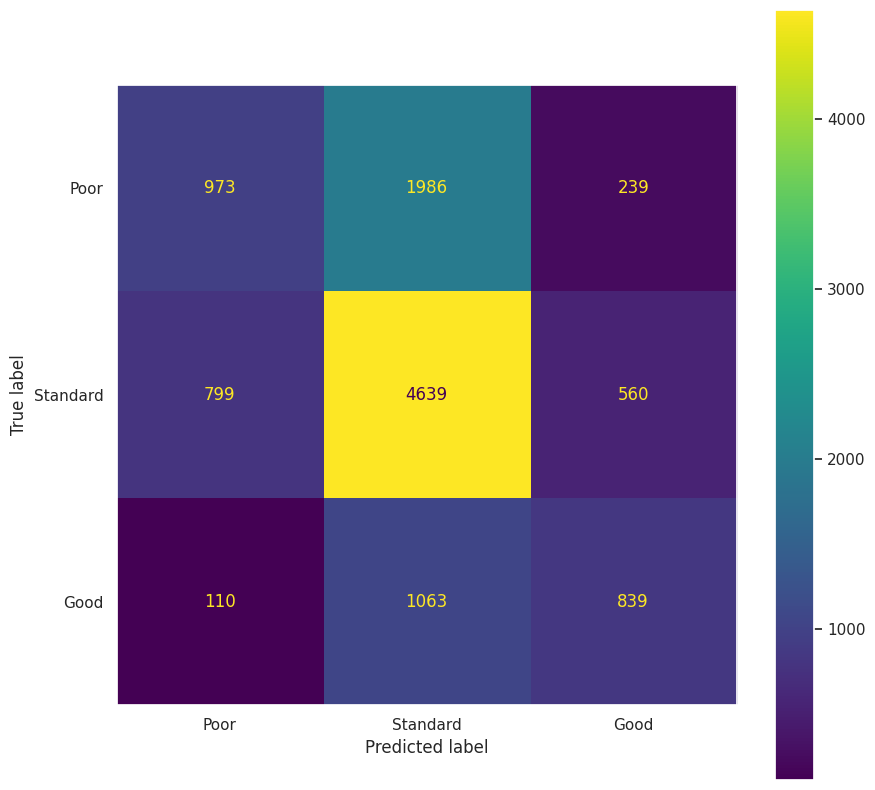

In [58]:
knn = KNeighborsClassifier(25).fit(X_train_clean, y_train_clean)
evaluate_classification(knn, "KNeighborsClassifiern", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

## Naive Bayes
Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle. Every pair of features being classified is independent of each other.
The assumptions made by Naive Bayes are not generally correct in real-world situations. In-fact, the independence assumption is never correct but often works well in practice.

Now, it is important to know about Bayes’ theorem.

### Bayes’ Theorem

Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

<img src = https://hands-on.cloud/wp-content/uploads/2022/01/Implementing-Naive-Bayes-Classification-using-Python.png width=600/>

where A and B are events and P(B) ≠ 0.

* Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
* P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
* P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.

Training Accuracy Naive Bayes 56.40768252693569  Test Accuracy Naive Bayes 55.21948608137045


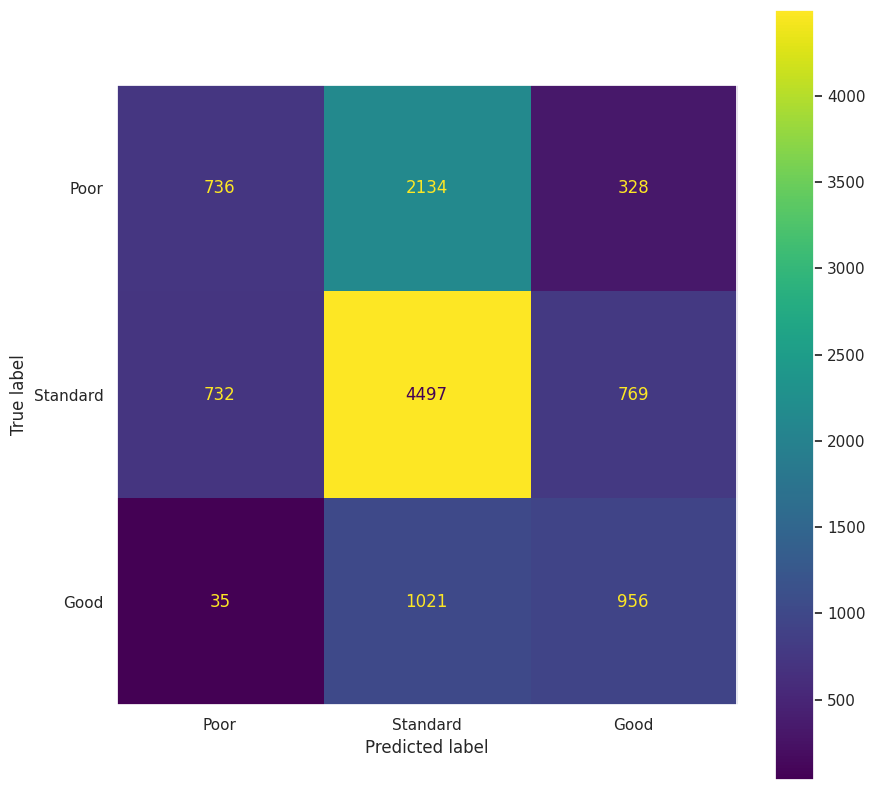

In [59]:
gnb = GaussianNB().fit(X_train_clean, y_train_clean)
evaluate_classification(gnb, "Naive Bayes", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

## Decision Tree
Decision Tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

<img src= https://i.ytimg.com/vi/ZVR2Way4nwQ/maxresdefault.jpg width=600/>

A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions.Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. An instance is classified by starting at the root node of the tree, testing the attribute specified by this node, then moving down the tree branch corresponding to the value of the attribute as shown in the above figure. This process is then repeated for the subtree rooted at the new node. 
The decision tree in above figure classifies a particular morning according to whether it is suitable for playing tennis and returning the classification associated with the particular leaf.(in this case Yes or No). 

Training Accuracy DecisionTreeClassifier 82.97976756117691  Test Accuracy DecisionTreeClassifier 54.1220556745182


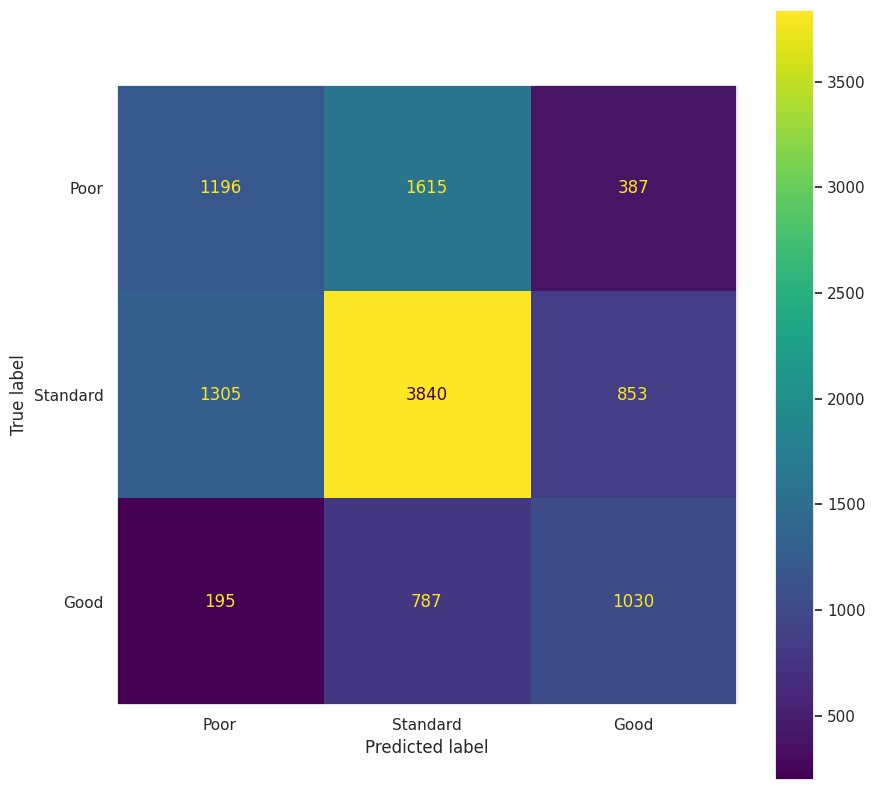

In [60]:
dt = DecisionTreeClassifier(max_depth=3).fit(X_train_clean, y_train_clean)
tdt = DecisionTreeClassifier().fit(X_train_clean, y_train_clean)
evaluate_classification(tdt, "DecisionTreeClassifier", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

### Note
We used a simple version with a max depth of 3 just for the visualization

[Text(0.5, 0.875, 'x[3] <= 0.847\ngini = 0.602\nsamples = 44829\nvalue = [13042, 23769, 8018]'),
 Text(0.25, 0.625, 'x[3] <= -0.637\ngini = 0.535\nsamples = 33794\nvalue = [11215, 19962, 2617]'),
 Text(0.125, 0.375, 'x[3] <= -0.704\ngini = 0.527\nsamples = 12801\nvalue = [6544, 5878, 379]'),
 Text(0.0625, 0.125, 'gini = 0.521\nsamples = 12375\nvalue = [6400, 5683, 292]'),
 Text(0.1875, 0.125, 'gini = 0.634\nsamples = 426\nvalue = [144, 195, 87]'),
 Text(0.375, 0.375, 'x[3] <= -0.209\ngini = 0.489\nsamples = 20993\nvalue = [4671, 14084, 2238]'),
 Text(0.3125, 0.125, 'gini = 0.638\nsamples = 4862\nvalue = [1246, 2295, 1321]'),
 Text(0.4375, 0.125, 'gini = 0.418\nsamples = 16131\nvalue = [3425, 11789, 917]'),
 Text(0.75, 0.625, 'x[29] <= -0.584\ngini = 0.614\nsamples = 11035\nvalue = [1827, 3807, 5401]'),
 Text(0.625, 0.375, 'x[32] <= -0.044\ngini = 0.64\nsamples = 323\nvalue = [69, 144, 110]'),
 Text(0.5625, 0.125, 'gini = 0.642\nsamples = 236\nvalue = [61, 109, 66]'),
 Text(0.6875, 0.12

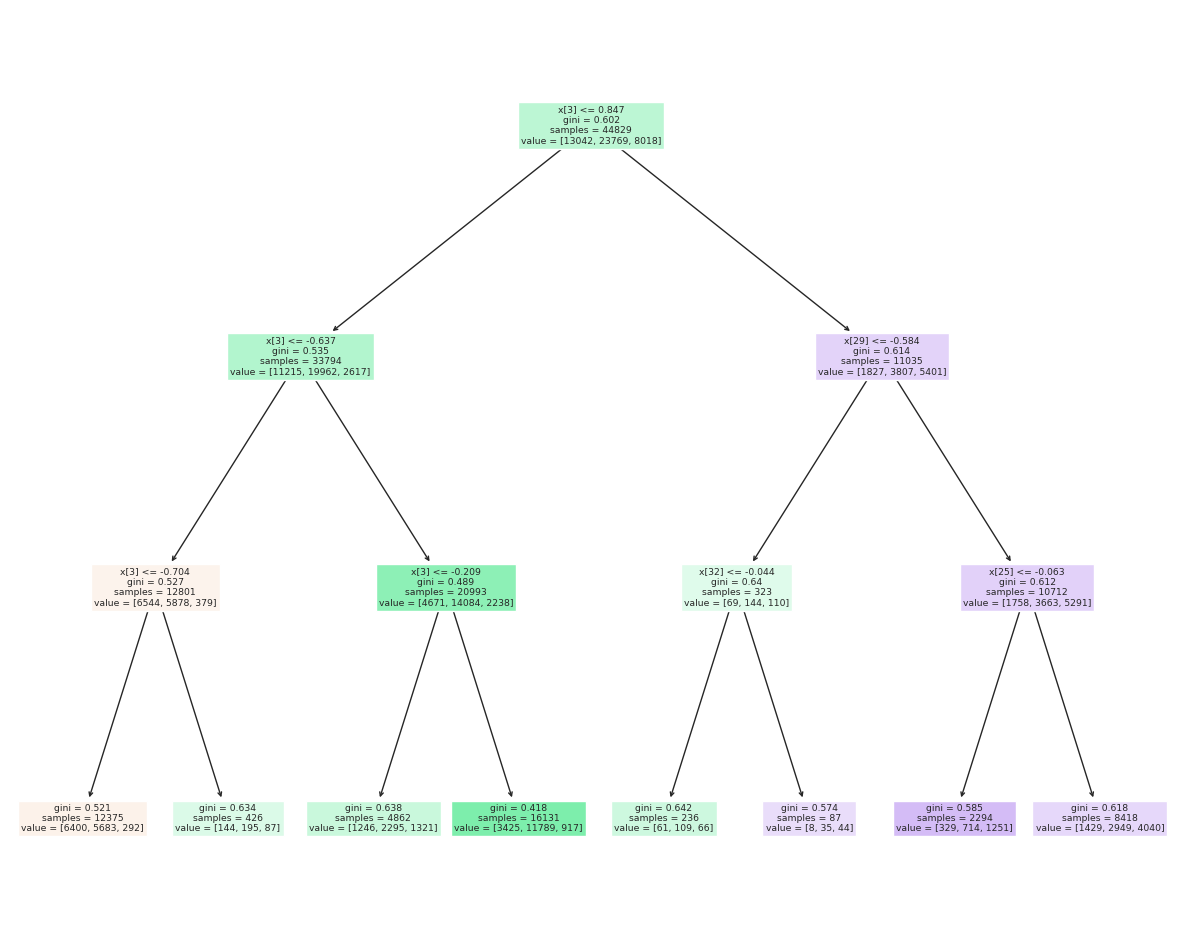

In [61]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

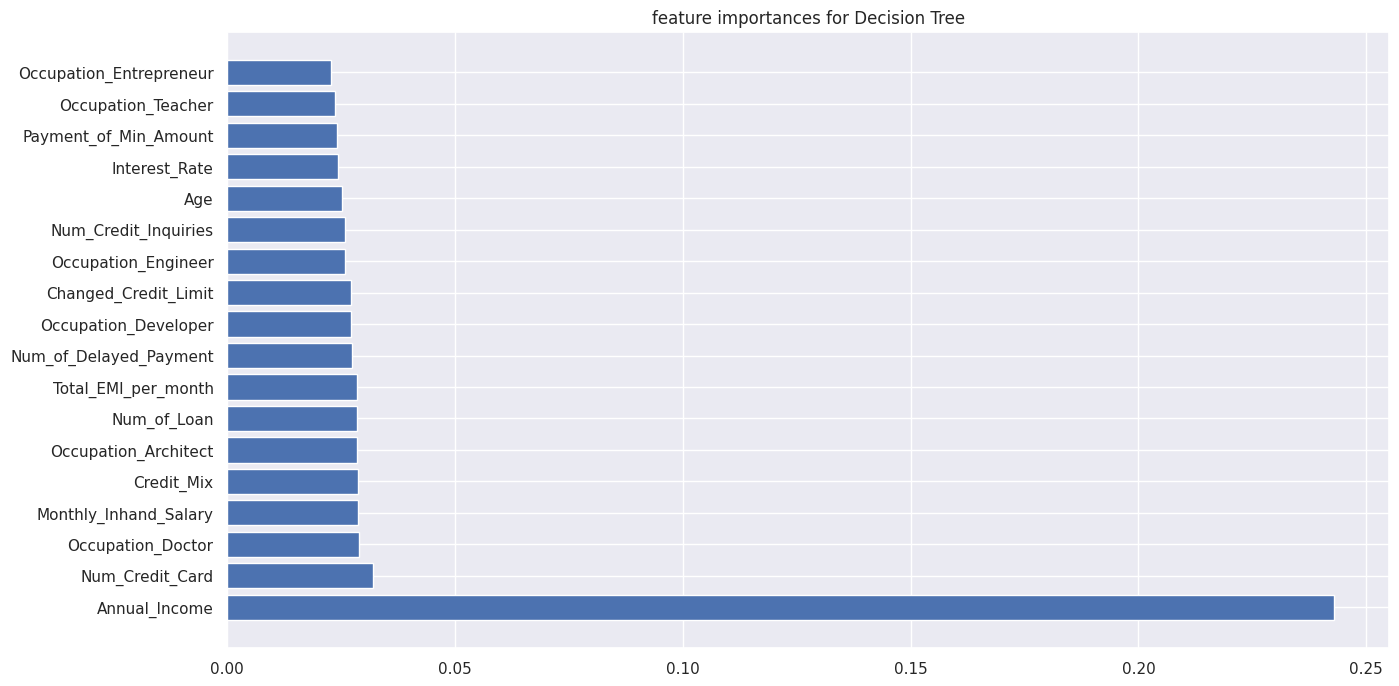

In [62]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = clean_df.drop(['Credit_Score'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

## Random forest
Random forest is a supervised learning algorithm. The “forest” it builds is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.One big advantage of random forest is that it can be used for both classification and regression problems, which form the majority of current machine learning systems. and It also resists overfitting found in decision trees.

Training Accuracy RandomForestClassifier 82.97307546454304  Test Accuracy RandomForestClassifier 59.47537473233405


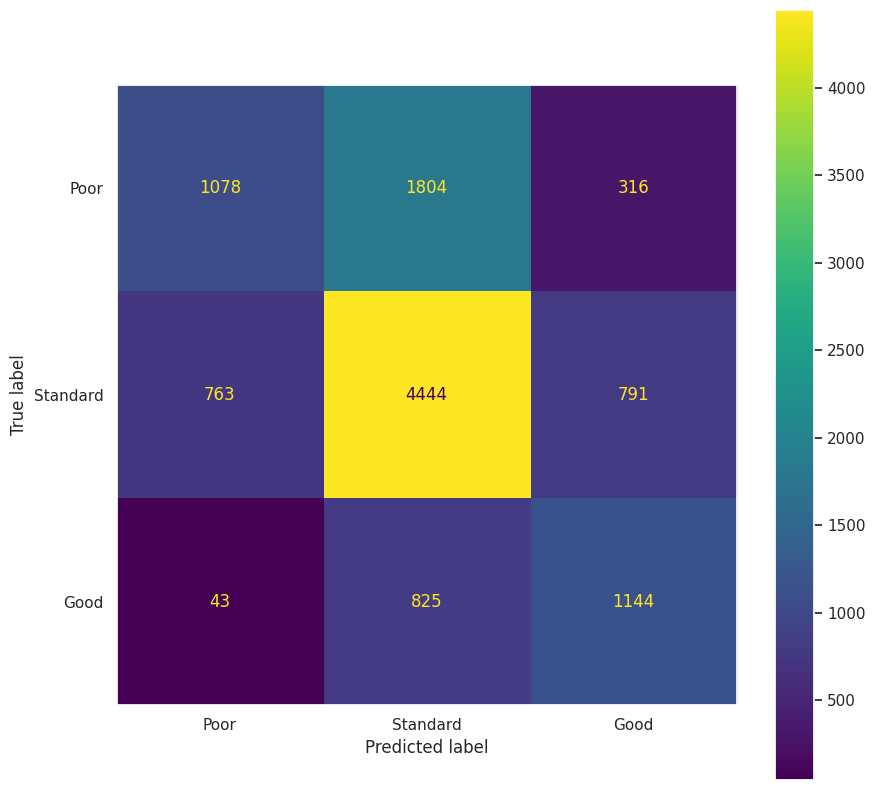

In [63]:
rf = RandomForestClassifier().fit(X_train_clean, y_train_clean)
evaluate_classification(rf, "RandomForestClassifier", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

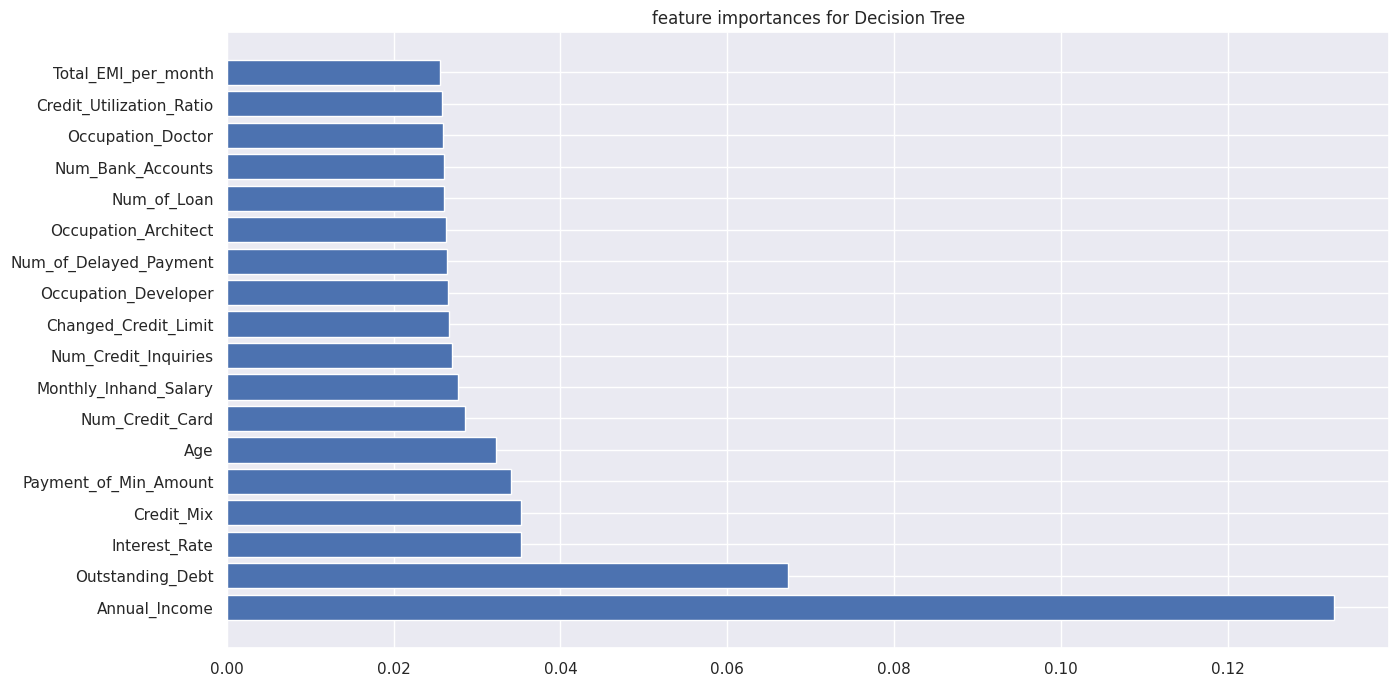

In [64]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

## Neural networks

Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.
Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

<img src= https://www.researchgate.net/publication/335903047/figure/fig1/AS:805611931443200@1569084260672/Proposed-artificial-neural-network-model-3-10-1-Neural-network-weight-vectors-are.png width=600/>

Neural networks rely on training data to learn and improve their accuracy over time. However, once these learning algorithms are fine-tuned for accuracy, they are powerful tools in computer science and artificial intelligence, allowing us to classify and cluster data at a high velocity. Tasks in speech recognition or image recognition can take minutes versus hours when compared to the manual identification by human experts. One of the most well-known neural networks is Google’s search algorithm.

In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train_clean.shape[1:])),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [66]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2176      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 3)                 387       
                                                                 
Total params: 43,907
Trainable params: 43,907
Non-trainable params: 0
_________________________________________________________________


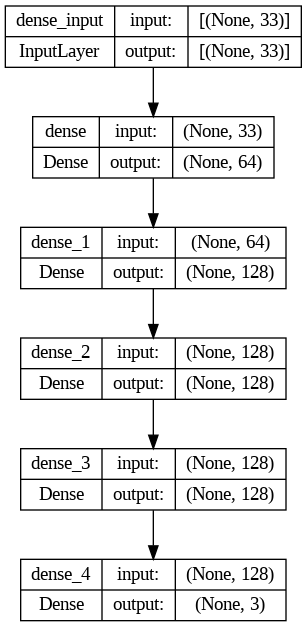

In [68]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train_clean, y_train_clean, validation_data=(X_test_clean, y_test_clean), epochs=250, verbose=0)

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

In [ ]:
keys = [key for key in evals.keys()]
values = [value for value in evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='r', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

## Conclusions

* We used several classification models to fit our data and it seems that their performance wasn't quite satisfying for me so the issue here is clearly with the data or its cleaning process so this shall be improved in the next version.
* When it comes to the main purpose of this notebook is actually to give a simple but adequate introduction to different classification techniques. We've also did a quick explaination to the most relevant preprocessing steps and we still hope for more improvements in the versions to come.